
# KPI Dashboard — Data Analytics + ML Project

This project is an end-to-end data analytics + machine learning dashboard built using Python, Pandas, Matplotlib, Streamlit, and ML models (Isolation Forest + Prophet).
It analyzes real user-interaction event logs and generates daily KPIs, trends, forecasts, and AI-driven insights. The data set used is based on the user interaction data

# What This Project Does

This dashboard cleans messy UI interaction logs, extracts valid timestamps, computes KPIs for every day, and visualizes:

DAU (Daily Active Users)

Sessions per day

Average session duration

Session duration distribution

Anomaly detection

Forecasting future DAU

Automatic AI insight generation

All graphs respond instantly to filters in the sidebar.



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prophet as Prophet
from datetime import datetime
import streamlit as st
ui=pd.read_csv(r"downloads/mobile.csv")

ui.head()

,timestamp,user_id,session_id,ip_address,device_os,device_os_version,device_model,screen_resolution,location_country,location_city,...,memory_usage_mb,event_type,event_target,event_value,app_version,session_duration_sec,is_subscribed,user_age,phone_number,push_enabled
0,2025-01-13T23:12:43,13457,S-852694,181.246.29.95,Android,9.9,OnePlus 9,1080x1920,Senegal,South Luiston,...,3687,double_tap,profile_image,5,2.6.8,3311,True,51,001-423-901-2346x818,False
1,2024-12-24T22:57:29,95977,S-766538,59.155.205.42,Android,7.9,Samsung Galaxy S22,1080x1920,Greenland,Lake Brandonton,...,3521,pinch,search_bar,6,3.3.6,3283,False,40,(437)544-4735,False
2,2024-12-22T09:00:26,52758,S-228244,183.205.124.1,iOS,15.1,iPhone 13,1080x1920,Falkland Islands (Malvinas),Julieside,...,639,zoom,menu_icon,6,5.4.5,2870,True,73,001-815-298-0574x8189,True
3,2025-01-07T02:53:07,53777,S-633216,179.124.111.38,iOS,16.1,iPhone 14 Pro,720x1280,Comoros,North Steven,...,119,long_press,checkout_button,9,4.7.1,332,True,47,(252)814-8186,False
4,2024-12-22T15:58:18,6302,S-508537,198.184.172.85,Android,7.6,Motorola Edge,1080x1920,Mayotte,Ernestport,...,1789,view,settings_button,7,2.0.8,1694,True,32,+1-778-241-8813,False


In [2]:
ui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   timestamp             99694 non-null  object
 1   user_id               99659 non-null  object
 2   session_id            99680 non-null  object
 3   ip_address            99683 non-null  object
 4   device_os             99686 non-null  object
 5   device_os_version     99626 non-null  object
 6   device_model          99646 non-null  object
 7   screen_resolution     99688 non-null  object
 8   location_country      99680 non-null  object
 9   location_city         99692 non-null  object
 10  app_language          99672 non-null  object
 11  network_type          99661 non-null  object
 12  battery_level         99710 non-null  object
 13  memory_usage_mb       99682 non-null  object
 14  event_type            99650 non-null  object
 15  event_target          99680 non-nul

In [3]:
ui.describe()

,timestamp,user_id,session_id,ip_address,device_os,device_os_version,device_model,screen_resolution,location_country,location_city,...,memory_usage_mb,event_type,event_target,event_value,app_version,session_duration_sec,is_subscribed,user_age,phone_number,push_enabled
count,99694,99659,99680,99683,99686,99626,99646,99688,99680,99692,...,99682,99650,99680,99683,99670,99680,99660,99649,99681,99662
unique,97810,63120,94372,99682,577,754,595,633,906,38557,...,4657,646,601,426,1118,4167,566,662,99681,546
top,2024-12-30T00:48:58,44686,S-397290,213.152.246.17,Android,13.1,Xiaomi Mi 11,1080x1920,Korea,Lake Michael,...,2990,click,checkout_button,10,2.3.5,3426,False,38,001-423-901-2346x818,False
freq,3,8,4,2,56622,1657,9594,20035,837,101,...,43,10067,12693,10013,236,44,49575,1560,1,49590


In [4]:
ui.shape

(100000, 23)

In [5]:
ui.dtypes

timestamp               object
user_id                 object
session_id              object
ip_address              object
device_os               object
device_os_version       object
device_model            object
screen_resolution       object
location_country        object
location_city           object
app_language            object
network_type            object
battery_level           object
memory_usage_mb         object
event_type              object
event_target            object
event_value             object
app_version             object
session_duration_sec    object
is_subscribed           object
user_age                object
phone_number            object
push_enabled            object
dtype: object

In [6]:
ui.isnull().sum()

timestamp               306
user_id                 341
session_id              320
ip_address              317
device_os               314
device_os_version       374
device_model            354
screen_resolution       312
location_country        320
location_city           308
app_language            328
network_type            339
battery_level           290
memory_usage_mb         318
event_type              350
event_target            320
event_value             317
app_version             330
session_duration_sec    320
is_subscribed           340
user_age                351
phone_number            319
push_enabled            338
dtype: int64

In [7]:
#taking only columns that are required for KPIs
required_cols = [
    'timestamp',
    'user_id',
    'session_id',
    'event_type',
    'session_duration_sec'
]
ui = ui[required_cols]
ui['timestamp'] = pd.to_datetime(ui['timestamp'], errors='coerce', utc=True)
ui['timestamp'] = ui['timestamp'].dt.tz_convert('Asia/Kolkata').dt.tz_localize(None)
ui=ui.dropna(subset=['timestamp'])
ui['user_id']=pd.to_numeric(ui['user_id'],errors='coerce')
ui=ui.dropna(subset=['user_id'])
ui['session_duration_sec']=pd.to_numeric(ui['session_duration_sec'],errors='coerce')
ui['session_duration_sec']=ui['session_duration_sec'].fillna(ui['session_duration_sec'].median())
ui['event_type']=ui['event_type'].fillna('unknown')
ui['date']=ui['timestamp'].dt.normalize()
ui=ui.reset_index(drop=True)

In [8]:
#converting timestamps to datetime and derive date/hour
ui['timestamp']=pd.to_datetime(ui['timestamp'])
ui['date']=ui['timestamp'].dt.date
ui['hour']=ui['timestamp'].dt.hour

In [9]:
#Computing our first KPI DAU (Daily Active Users)
dau=ui.groupby('date')['user_id'].nunique().reset_index(name='DAU') 
#groupby('date'): aggregate rows by day
#['user_id'].nunique(): counts unique users per day = DAU.
#.reset_index(name='DAU'): returns a tidy DataFrame with columns date and DAU.

In [10]:
#2nd KPI : Sessions per day
sessions_per_day=ui.groupby('date')['session_id'].nunique().reset_index(name='sessions')

In [11]:
#3rd KPI : Average Session duration per day
avg_session_duration=ui.groupby('date')['session_duration_sec'].nunique().reset_index(name='avg_session_duration_sec')
#To avoid double count we aggregate the session id first
session_lengths = ui.groupby('session_id')['session_duration_sec'].max().reset_index()
avg_per_day = ui.merge(session_lengths, on='session_id').groupby('date')['session_duration_sec_y'].mean()


In [12]:
#Merging The KPIs into one dashboard Dataframe
dashboard= dau\
.merge(sessions_per_day,on='date')\
.merge(avg_session_duration,on='date')
dashboard['date'] = pd.to_datetime(dashboard['date'])
dashboard = dashboard.sort_values('date')


In [13]:
#merging 3 speerate KPI tables into one dashboard table by using outer join. Outer jooin helps keep all dates from all tables
dashboard = dau.merge(sessions_per_day, on='date', how='outer').merge(avg_session_duration, on='date', how='outer').fillna(0)

In [14]:
#handling timezones and parsing safety and de-duplicating events
ui['timestamp'] = pd.to_datetime(ui['timestamp'], utc=True).dt.tz_convert('Asia/Kolkata')
ui['timestamp'] = pd.to_datetime(ui['timestamp'], errors='coerce')
bad = ui['timestamp'].isna().sum()
print(f"Bad timestamps: {bad}")
ui = ui.drop_duplicates(subset=['timestamp','user_id','session_id','event_type'])



Bad timestamps: 0


Bad rows count: 5


,timestamp,user_id,session_id,event_type,session_duration_sec,date,hour
9779,2034-12-30 15:31:23+05:30,55379.0,S-952336,like,1503.0,2034-12-30,10
8878,2044-12-30 12:32:04+05:30,36201.0,S-327480,click,3125.0,2044-12-30,7
32910,2054-12-26 07:55:43+05:30,72561.0,S-296215,zoom,804.0,2054-12-26,2
89160,2084-12-19 21:23:10+05:30,45762.0,S-307502,like,2773.0,2084-12-19,15
43612,2125-01-08 09:43:37+05:30,81781.0,S-456715,pinch,2157.0,2125-01-08,4


Rows after cleaning: 98155
dashboard min/max: 2024-01-13 00:00:00+05:30 2025-01-16 00:00:00+05:30
unique years: [2024, 2025]
                       date   dau  sessions  avg_session_duration_sec
0 2024-01-13 00:00:00+05:30     1         1               2683.000000
1 2024-12-13 00:00:00+05:30     1         1               2847.000000
2 2024-12-17 00:00:00+05:30  3049      3074               1854.332466
3 2024-12-18 00:00:00+05:30  3117      3135               1881.847854
4 2024-12-19 00:00:00+05:30  3262      3305               1865.301979


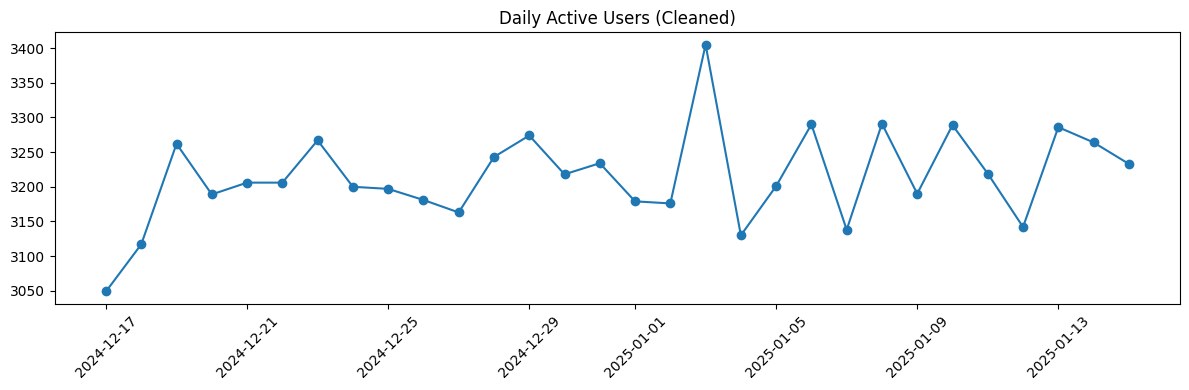

In [15]:
# 1) Inspect bad rows (optional, see what you'll remove)
bad_rows = ui[ui['timestamp'].dt.year > 2026].sort_values('timestamp')
print("Bad rows count:", len(bad_rows))
display(bad_rows)   # notebook-friendly

# 2) Drop them from the source dataframe (permanent for this session)
ui = ui[ui['timestamp'].dt.year <= 2026].copy()
print("Rows after cleaning:", len(ui))

# 3) Recreate normalized date (datetime64)
ui['date'] = ui['timestamp'].dt.normalize()

# 4) Recompute KPIs from cleaned ui
dau = ui.groupby('date')['user_id'].nunique().reset_index(name='dau')
sessions_per_day = ui.groupby('date')['session_id'].nunique().reset_index(name='sessions')

session_lengths = (
    ui.groupby('session_id')
      .agg(
          date=('timestamp', lambda x: x.min().normalize()),
          session_duration_sec=('session_duration_sec', 'max')
      )
      .reset_index()
)

avg_session_duration = session_lengths.groupby('date')['session_duration_sec'].mean().reset_index(name='avg_session_duration_sec')

dashboard = (
    dau
    .merge(sessions_per_day, on='date', how='outer')
    .merge(avg_session_duration, on='date', how='outer')
    .fillna(0)
).sort_values('date').reset_index(drop=True)

# 5) Quick diagnostics
print("dashboard min/max:", dashboard['date'].min(), dashboard['date'].max())
print("unique years:", sorted(dashboard['date'].dt.year.unique()))
print(dashboard.head())

# 6) Plot the cleaned timeline
dashboard_filtered = dashboard[dashboard['dau'] > 50].copy()
dashboard_filtered = dashboard_filtered.sort_values('date')
dashboard_filtered = dashboard[dashboard['dau'] > 500]  # or > 1000


plt.figure(figsize=(12,4))
plt.plot(dashboard_filtered['date'], dashboard_filtered['dau'], marker='o')
plt.title("Daily Active Users (Cleaned)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:

parsed = pd.to_datetime(ui['timestamp'], errors='coerce')
bad_mask = parsed.isna()
print("Total bad timestamps:", bad_mask.sum())

# show the unique bad strings (helps choose a fix)
bad_examples = ui.loc[bad_mask, 'timestamp'].drop_duplicates().tolist()
print(bad_examples[:50])   # show first 50 unique bad strings

Total bad timestamps: 915
[nan, '1HsyJo', '2024-12-26r08:18:13', 'Cdjews', '8qiCqN', '2024-12-17n19:15:37', 'epf4yL', 'pP1C5x', 'gY82mD', '2024-12-19904:14:48', '4NyQ8L', '2025-01-09Tu3:55:09', 'KU0YzU', 'paL6CT', 'stMi1P', '2024-12r21T02:29:23', '2024-12X19T01:20:00', '3g2rTb', '2024-12-1mT05:35:22', '2025-01-13T16:r8:17', 'yhgT5Y', '2024-12-16T20:06:4Z', '2025-01-P2T03:40:13', '20J4-12-19T02:16:58', '8hy515', 'yVb39o', '2025-01-09T18049:38', 'izN0Pf', 'mmNZQj', 'IxZ6i5', 'RBnfIP', 'X025-01-10T01:23:16', 'AqMx2p', 'EbNpV0', 'TXTTUi', 'Zl8gqy', '2025-01-1dT02:14:40', 'qYOWJz', '2025-01-06TY5:12:53', 'QUT09f', 'SwOv8u', '2025-g1-05T06:11:05', 'ICORaB', '2024-12-31T10:15:m9', 'XcfETs', 'cnRgpT', 'LqNCA2', '80xUDW', 'YMYczi', '2025-01-1cT11:40:37']


In [22]:
ui['timestamp_parsed'] = pd.to_datetime(ui['timestamp'], errors='coerce', utc=True)
bad_count = ui['timestamp_parsed'].isna().sum()
print("Bad/parsing-failed rows:", bad_count)
# handle or drop them
# ui = ui.dropna(subset=['timestamp_parsed'])  # if you want to drop


Bad/parsing-failed rows: 915


In [24]:
fix_map = {
  "2025-01-10T16:5F:18": "2025-01-10T16:54:18",
  # ...
}
ui['timestamp'] = ui['timestamp'].replace(fix_map)
# then re-run parsing steps


In [27]:

# aggressive-extract-and-parse timestamps (run this cell)
import re
import pandas as pd
import numpy as np

def extract_datetime_substring(s):
    """Return a cleaned datetime string 'YYYY-MM-DD HH:MM:SS' or None."""
    if s is None or (isinstance(s, float) and np.isnan(s)):
        return None
    s = str(s).strip()
    if s.lower() in {'nan','none','null','na'}:
        return None

    # 1) find a YYYY-MM-DD (allow 2-4 digit year, various separators)
    date_match = re.search(r'(\d{2,4})\D+(\d{1,2})\D+(\d{1,2})', s)
    if not date_match:
        # fallback: try ISO-like YYYYMMDD (rare)
        iso_m = re.search(r'(\d{4})(\d{2})(\d{2})', s)
        if iso_m:
            y,m,d = iso_m.groups()
            return f"{int(y):04d}-{int(m):02d}-{int(d):02d}"
        return None

    y, m, d = date_match.groups()
    # normalize year
    if len(y) == 2:
        y = '20' + y
    elif len(y) == 3:
        y = y.zfill(4)
    y, m, d = int(y), int(m), int(d)
    try:
        date_part = f"{y:04d}-{m:02d}-{d:02d}"
    except Exception:
        return None

    # 2) find a time substring HH:MM:SS (allow non-digits between parts)
    time_match = re.search(r'(\d{1,2})\D+(\d{1,2})\D+(\d{1,2})', s)
    # But time_match can be the same match as date_match; ensure we pick a time after the date
    time_match_after = None
    if time_match:
        # make sure time occurs after the matched date part in the original string
        date_span = date_match.span()
        # search for time after date_span[1]
        time_match_after = re.search(r'(\d{1,2})\D+(\d{1,2})\D+(\d{1,2})', s[date_span[1]:])
        if time_match_after:
            hh, mm, ss = [int(g) for g in time_match_after.groups()]
            return f"{date_part} {hh:02d}:{mm:02d}:{ss:02d}"

    # 3) no time found - return date only
    return date_part

# Apply to your df
# Make a working copy column to avoid overwriting original until checked
ui['timestamp_str'] = ui['timestamp'].astype(str)

# Run extraction on rows that still failed earlier parsing OR on all rows (safer)
extraction_mask = ui['timestamp_parsed0'].isna()  # only try to fix those that failed first parse
# you can also do: extraction_mask = ~ui['timestamp_parsed0'].notna() or ui['timestamp_str'].notna()

ui.loc[extraction_mask, 'timestamp_extracted'] = ui.loc[extraction_mask, 'timestamp_str'].apply(extract_datetime_substring)

# Attempt parsing
ui['timestamp_extracted_parsed'] = pd.to_datetime(ui['timestamp_extracted'], errors='coerce', utc=True)

# Combine the parsing columns (prefer originally parsed, then extracted)
ui['timestamp_final'] = ui['timestamp_parsed0'].combine_first(ui['timestamp_extracted_parsed'])

# Report diagnostics
initial_bad = ui['timestamp_parsed0'].isna().sum()
after_extraction_bad = ui['timestamp_final'].isna().sum()
fixed = initial_bad - after_extraction_bad

print(f"Initial parse-failed rows: {initial_bad}")
print(f"Fixed by extraction: {fixed}")
print(f"Still bad after extraction: {after_extraction_bad}")

# Show sample remaining bad strings for manual patching
remaining_bad_samples = ui[ui['timestamp_final'].isna()]['timestamp_str'].drop_duplicates().tolist()
print("\nSample remaining bad strings (up to 50):")
for s in remaining_bad_samples[:50]:
    print(" -", s)

# Optionally drop remaining bad rows (uncomment if you want)
# ui = ui.dropna(subset=['timestamp_final']).copy()
# print("Rows after dropping remaining bad:", len(ui))


Initial parse-failed rows: 23
Fixed by extraction: 23
Still bad after extraction: 0

Sample remaining bad strings (up to 50):


Dropped 766 sessions with non-positive or absurd durations.
Saved data/ui_events_clean.csv and data/daily_kpis.csv
dashboard min/max: 2020-05-03 00:00:00 2025-01-17 00:00:00
unique years: [2020, 2024, 2025]
rows in dashboard: 36


,date,dau,sessions,avg_session_duration_sec
0,2020-05-03,1,1,1295.0
1,2024-01-15,1,1,2683.0
2,2024-02-19,1,1,2709.0
3,2024-02-21,1,1,3193.0
4,2024-12-14,1,1,2847.0


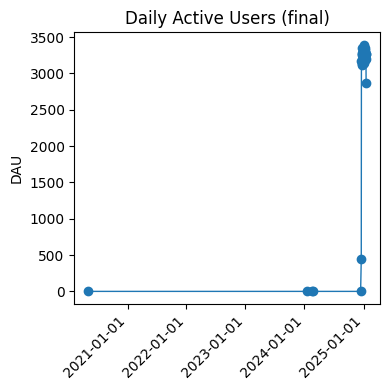

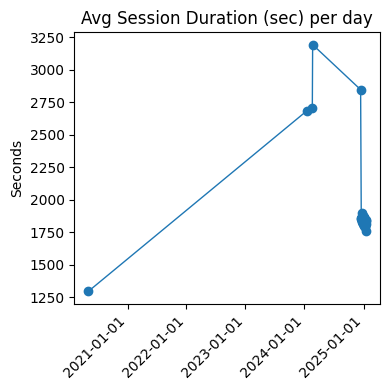

In [39]:
# FINAL CLEANUP + KPI RECOMPUTE + SAVE + PLOT (one cell)
import os, re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ---- ensure data folder ----
os.makedirs("data", exist_ok=True)

# ---- helper to extract if needed (conservative) ----
def _extract_datetime_substring(s):
    if pd.isna(s):
        return None
    s = str(s).strip()
    s2 = re.sub(r'[^0-9T:\- ]', '', s).replace('T', ' ')
    s2 = re.sub(r'\s+', ' ', s2).strip()
    # try date
    m = re.search(r'(\d{2,4})\D+(\d{1,2})\D+(\d{1,2})', s2)
    if not m:
        iso = re.search(r'(\d{4})(\d{2})(\d{2})', s2)
        if iso:
            y,mth,d = iso.groups(); return f"{int(y):04d}-{int(mth):02d}-{int(d):02d}"
        return None
    y,mth,d = m.groups()
    if len(y) == 2: y = '20'+y
    elif len(y) == 3: y = y.zfill(4)
    y,mth,d = int(y), int(mth), int(d)
    date_part = f"{y:04d}-{mth:02d}-{d:02d}"
    # time after date part
    time_after = s2[m.span()[1]:]
    t = re.search(r'(\d{1,2})\D+(\d{1,2})\D+(\d{1,2})', time_after)
    if t:
        hh,mm,ss = [int(g) for g in t.groups()]
        return f"{date_part} {hh:02d}:{mm:02d}:{ss:02d}"
    return date_part

# ---- 0: require `ui` DataFrame in memory ----
try:
    ui  # exists
except NameError:
    raise RuntimeError("No DataFrame named 'ui' found. Load your CSV into `ui` before running this cell.")

# ---- 1: create canonical timestamp_final if missing ----
if 'timestamp_final' not in ui.columns:
    ui['timestamp_parsed0'] = pd.to_datetime(ui['timestamp'], errors='coerce', utc=True)
    bad_mask = ui['timestamp_parsed0'].isna()
    if bad_mask.any():
        ui.loc[bad_mask, 'timestamp_clean_str'] = ui.loc[bad_mask, 'timestamp'].astype(str).apply(_extract_datetime_substring)
        ui['timestamp_parsed1'] = pd.to_datetime(ui['timestamp_clean_str'], errors='coerce', utc=True)
        ui['timestamp_final'] = ui['timestamp_parsed0'].combine_first(ui['timestamp_parsed1'])
    else:
        ui['timestamp_final'] = ui['timestamp_parsed0']
else:
    if not pd.api.types.is_datetime64_any_dtype(ui['timestamp_final']):
        ui['timestamp_final'] = pd.to_datetime(ui['timestamp_final'], errors='coerce', utc=True)

# drop any totally unparseable rows (should be minimal)
bad_count = ui['timestamp_final'].isna().sum()
if bad_count:
    print(f"Dropping {bad_count} rows with unparseable timestamps.")
    ui = ui.dropna(subset=['timestamp_final']).copy()

# ---- 2: timezone safety: localize & convert to Asia/Kolkata (then drop tz info) ----
# If tz-naive, assume UTC (we parsed with utc=True above when possible)
if ui['timestamp_final'].dt.tz is None:
    ui['timestamp_final'] = ui['timestamp_final'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata').dt.tz_localize(None)
else:
    ui['timestamp_final'] = ui['timestamp_final'].dt.tz_convert('Asia/Kolkata').dt.tz_localize(None)

# ---- 3: normalized date ----
ui['date'] = ui['timestamp_final'].dt.normalize()

# ---- 4: ensure session duration numeric & clean absurd values ----
if 'session_duration_sec' in ui.columns:
    ui['session_duration_sec'] = pd.to_numeric(ui['session_duration_sec'], errors='coerce').fillna(0)
else:
    ui['session_duration_sec'] = 0

# ---- 5: remove rows with clearly garbage years from source (keep 2020..2026) ----
# adjust range if needed
year_min, year_max = 2020, 2026
mask_years = ui['timestamp_final'].dt.year.between(year_min, year_max)
removed = (~mask_years).sum()
if removed:
    print(f"Removing {removed} rows outside year range {year_min}-{year_max}.")
ui = ui[mask_years].copy()

# ---- 6: build per-session table ----
session_lengths = (
    ui.groupby('session_id')
      .agg(
          user_id = ('user_id','first'),
          date = ('timestamp_final', lambda x: pd.to_datetime(x.min()).normalize()),
          session_duration_sec = ('session_duration_sec','max')   # or sum() depending on source semantics
      )
      .reset_index()
)
# clip absurd durations: keep 1s..86400s (24h)
session_lengths['session_duration_sec'] = pd.to_numeric(session_lengths['session_duration_sec'], errors='coerce').fillna(0)
before_len = len(session_lengths)
session_lengths = session_lengths[(session_lengths['session_duration_sec'] > 0) & (session_lengths['session_duration_sec'] <= 86400)].copy()
dropped_sessions = before_len - len(session_lengths)
if dropped_sessions:
    print(f"Dropped {dropped_sessions} sessions with non-positive or absurd durations.")

# ---- 7: daily KPIs ----
dau = ui.groupby('date')['user_id'].nunique().reset_index(name='dau')
sessions_per_day = ui.groupby('date')['session_id'].nunique().reset_index(name='sessions')
avg_session_duration = session_lengths.groupby('date')['session_duration_sec'].mean().reset_index(name='avg_session_duration_sec')

# ---- 8: merge into dashboard and force date dtype ----
dashboard = (
    dau
    .merge(sessions_per_day, on='date', how='outer')
    .merge(avg_session_duration, on='date', how='outer')
    .fillna(0)
)
dashboard['date'] = pd.to_datetime(dashboard['date'])
dashboard = dashboard.sort_values('date').reset_index(drop=True)

# ---- 9: final safety filter (same year bounds) ----
dashboard = dashboard[dashboard['date'].dt.year.between(year_min, year_max)].copy()
dashboard = dashboard.sort_values('date').reset_index(drop=True)

# ---- 10: save cleaned data + dashboard ----
ui.to_csv("data/ui_events_clean.csv", index=False)
dashboard.to_csv("data/daily_kpis.csv", index=False)
print("Saved data/ui_events_clean.csv and data/daily_kpis.csv")

# ---- 11: quick diagnostics ----
print("dashboard min/max:", dashboard['date'].min(), dashboard['date'].max())
print("unique years:", sorted(dashboard['date'].dt.year.unique()))
print("rows in dashboard:", len(dashboard))
display(dashboard.head())

# ---- 12: plotting (DAU and avg session duration) ----
# DAU
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(dashboard['date'], dashboard['dau'], marker='o', linewidth=1)
ax.set_title("Daily Active Users (final)")
ax.set_ylabel("DAU")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Avg session duration (seconds)
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(dashboard['date'], dashboard['avg_session_duration_sec'], marker='o', linewidth=1)
ax.set_title("Avg Session Duration (sec) per day")
ax.set_ylabel("Seconds")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [40]:
import os

# ensure folder exists
os.makedirs("data", exist_ok=True)

# 1) EXPORT cleaned event-level data
ui.to_csv("data/ui_events_clean.csv", index=False)
print("Saved: data/ui_events_clean.csv")

# 2) EXPORT daily KPI dashboard data
dashboard.to_csv("data/daily_kpis.csv", index=False)
print("Saved: data/daily_kpis.csv")

print("\nAll exports done. You are ready for Streamlit 🚀")


Saved: data/ui_events_clean.csv
Saved: data/daily_kpis.csv

All exports done. You are ready for Streamlit 🚀


In [43]:

ui.head()
dashboard.head()


,date,dau,sessions,avg_session_duration_sec
0,2020-05-03,1,1,1295.0
1,2024-01-15,1,1,2683.0
2,2024-02-19,1,1,2709.0
3,2024-02-21,1,1,3193.0
4,2024-12-14,1,1,2847.0


Refrence link: https://www.kaggle.com/datasets/mohamedmoslemani/user-mobile-app-interaction-data